In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Encoding Data.csv")
df1 = df.copy()
df1.head(5)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold


In [ ]:
df = pd.get_dummies(df, columns = ['bin_1','bin_2'])
df

,id,nom_0,ord_2,bin_1_F,bin_1_T,bin_2_N,bin_2_Y
0,0,Red,Hot,1,0,1,0
1,1,Blue,Warm,1,0,0,1
2,2,Blue,Cold,1,0,1,0
3,3,Green,Warm,1,0,1,0
4,4,Red,Cold,0,1,1,0
5,5,Green,Hot,0,1,1,0
6,6,Red,Cold,1,0,1,0
7,7,Red,Cold,0,1,1,0
8,8,Blue,Warm,1,0,1,0
9,9,Red,Hot,1,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, OneHotEncoder
climate = ['Cold','Warm','Hot']
enc = OrdinalEncoder(categories = [climate])
enc.fit_transform(df1[["ord_2"]])

array([[2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.]])

In [ ]:
df1['Ord_2'] = enc.fit_transform(df1[["ord_2"]])
df1.head(5)

,id,bin_1,bin_2,nom_0,ord_2,Ord_2
0,0,F,N,Red,Hot,2.0
1,1,F,Y,Blue,Warm,1.0
2,2,F,N,Blue,Cold,0.0
3,3,F,N,Green,Warm,1.0
4,4,T,N,Red,Cold,0.0


In [ ]:
df2 = df1.copy()
le = LabelEncoder()
df2['Nom_0'] = le.fit_transform(df2[["nom_0"]])
df2.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,bin_1,bin_2,nom_0,ord_2,Ord_2,Nom_0
0,0,F,N,Red,Hot,2.0,2
1,1,F,Y,Blue,Warm,1.0,0
2,2,F,N,Blue,Cold,0.0,0
3,3,F,N,Green,Warm,1.0,1
4,4,T,N,Red,Cold,0.0,2


In [ ]:
df3 = df2.copy()
oe = OneHotEncoder()
oe.fit_transform(df3[["bin_1"]])
df3.head(5)

,id,bin_1,bin_2,nom_0,ord_2,Ord_2,Nom_0
0,0,F,N,Red,Hot,2.0,2
1,1,F,Y,Blue,Warm,1.0,0
2,2,F,N,Blue,Cold,0.0,0
3,3,F,N,Green,Warm,1.0,1
4,4,T,N,Red,Cold,0.0,2


In [ ]:
df4 = df3.copy()
oe = OneHotEncoder()
oe.fit_transform(df4[["bin_2"]])
df4.head(5)

,id,bin_1,bin_2,nom_0,ord_2,Ord_2,Nom_0
0,0,F,N,Red,Hot,2.0,2
1,1,F,Y,Blue,Warm,1.0,0
2,2,F,N,Blue,Cold,0.0,0
3,3,F,N,Green,Warm,1.0,1
4,4,T,N,Red,Cold,0.0,2


<Axes: xlabel='ord_2', ylabel='count'>

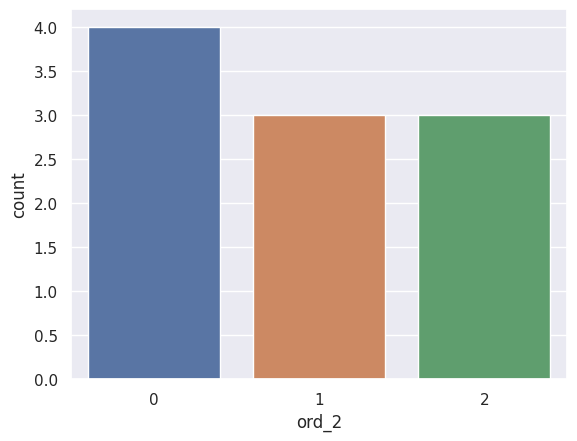

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ord_2'] = le.fit_transform(df['ord_2'])
sbn.set(style ="darkgrid")
sbn.countplot(x ='ord_2', data = df)